<a href="https://www.kaggle.com/code/rinichristy/kc-data-exploration-and-visualization?scriptVersionId=95777083" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **King County House Sale Data Exploration and Visualization**
---------------------------------------------------------
**Part: 1 of King County House Sale**

The aim of this project is to:<br></br>
[Part 1. Explore & Visualize the King County House sale data](https://www.kaggle.com/code/rinichristy/kc-data-exploration-and-visualization); <br>
[Part 2. Statistical Analysis of the data](https://www.kaggle.com/code/rinichristy/statistical-analysis-of-kc-house-sale-data);<br>
[Part 3. Build various regression models to predict the house sale price](https://www.kaggle.com/rinichristy/king-county-house-sale-price-prediction); <br>
[Part 4. K-means, K-medoids and DBSCAN Cluster analysis of KC data](https://www.kaggle.com/code/rinichristy/cluster-analysis-of-kc-data). <br>
[Part 5. Classification Prediction of K-medoids clusters of KC House Sale Data](https://www.kaggle.com/rinichristy/prediction-of-k-medoids-clusters-of-kc-data)

## **Table of Contents**

  * [Data Set Information: King County House Sale Data Set](#Dataset)<br>
  * [Data Exploration](#Explore)<br>
  * [Data Preprocessing](#Preprocessing)<br>
  * [Data Visualization](#Visualization)<br>

## **Import the required libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## **Load the dataset**

In [2]:
df = pd.read_csv("../input/kc-house/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Dataset Information:**<a name ='Dataset'></a>
The King County House sale dataset contains information regarding houses sold during the one year period ranging from May 2014 to May 2015. 

The dataset contains the following information:

| Features |  Description|
|----------------|------------------|
 |Id|            Unique Id for each house sold     |
|Date|         Date of House sale     |
|price |        House sale price     |
|bedrooms|   Number of bedrooms     |
|bathrooms|    Number of bathrooms, where .5 accounts for a bathroom with a toilet but no shower |
|sqft_living|    Square footage of interior living space of the house |
|sqft_lot|           Land area in square feet|
|floors|            Number of floors |
|waterfront|    Label to indicate whether the house was with waterfront or not|
|view|            Labels from 0 to 4 to indicate the view of house.|
|condition|     Labels from 1 to 5 to indicate the condition of the house|
|grade|            Labels from 1 to 13 to indicate the quality levels of construction and design, with 1 to 3 falls in the lowest level, 7 in the average label, and 11-13 in the highest quality level.|
|sqft_above|           Above ground level interior housing space in square feet. |
|sqft_basement| Below ground level interior housing space in square feet. |
|yr_built|            The year of construction of the house ranging from 1900 to 2015     |
|yr_renovated|    The year of last renovation of the house ranging from 1934 to 2015|
|zipcode | Zipcode area of the house|
|lat|   Latitude |
|long|  Longitude |
|sqft_living15| The interior living space in square feet for the nearest 15 neighbors|
|sqft_lot15| The land area in square feet for the nearest 15 neighbors |


## **Data Exploration**<a name = 'Explore'></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **Data Preprocessing** <a name = 'Preprocessing'></a>

### **Remove outlier from the data**

In [5]:
df[df['bedrooms']== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [6]:
df['price'].mean()/df['bedrooms'].mean()

160223.52936009006

It seems that the house with number of bedrooms 33 is an outlier. Checking the row for that value it was a 1620 square feet house with 1.75 bathrooms and a sale value of 640000. The average price per bedroom house calculated is 160223.5. So this entry is unreliable and is omitted from further analysis.  

In [7]:
df.shape

(21613, 21)

In [8]:
df.drop(15870, axis = 0, inplace = True)
# reset index, because a row is droped.
df.reset_index(drop=True, inplace = True)
df.shape

(21612, 21)

### **Checking for Missing Values**

In [9]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

No missing values detected. 

### **Feature Engineering from Date**
Extracting new features from date column adds extra dimension to the data. Features like date, month, year, day of week, month end or not etc can be extracted by splitting the date feature.   

In [10]:
# Convert to date time object
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [11]:
df['Date'] = df['date'].astype('str').apply(lambda x: x.split('-')[2])
df['Month'] = df['date'].apply(lambda x:x.month)
df['Year'] = df['date'].apply(lambda x:x.year)
df['Day of Week'] = df['date'].apply(lambda x: x.dayofweek)
df['Date'] = df['Date'].astype('int')
df['monthend'] = df['Date'].apply(lambda x: 1 if (x>20)  else 0)
df['monthbeginning'] = df['Date'].apply(lambda x: 1 if (x<10)  else 0)
df.drop(['date', 'id'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,47.5112,-122.257,1340,5650,13,10,2014,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,47.7210,-122.319,1690,7639,9,12,2014,1,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,47.7379,-122.233,2720,8062,25,2,2015,2,1,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,47.5208,-122.393,1360,5000,9,12,2014,1,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,47.6168,-122.045,1800,7503,18,2,2015,2,0,0


## **Data Visualization**<a name ='Visualization'></a>
### **Spatial data visualization of property locations**

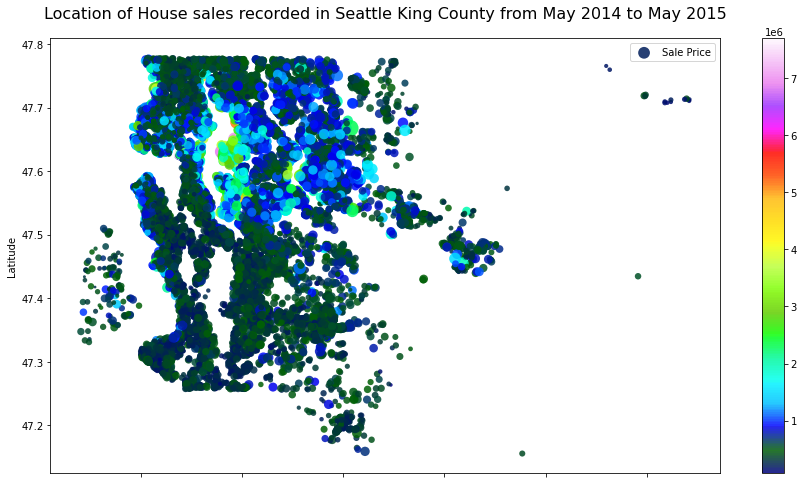

In [12]:
# visualization of coordinates with a scatter plot
df.plot(kind = 'scatter', x= 'long', y='lat', alpha=.85, c=df.price, s =df.sqft_living/50, edgecolor = 'none', 
        cmap = plt.get_cmap("gist_ncar"), figsize=(15, 8), colorbar=True, label = 'Sale Price')
#sns.scatterplot(x=df.long, y=df.lat, alpha=.85, hue=df.sqft_living/200, s=df.price*200, c =df.price, edgecolor = 'none', cmap = plt.get_cmap("magma"))
#plt.legend(bbox_to_anchor=(1.0, 0.25))
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Location of House sales recorded in Seattle King County from May 2014 to May 2015', loc='center', fontsize=16, pad=20);

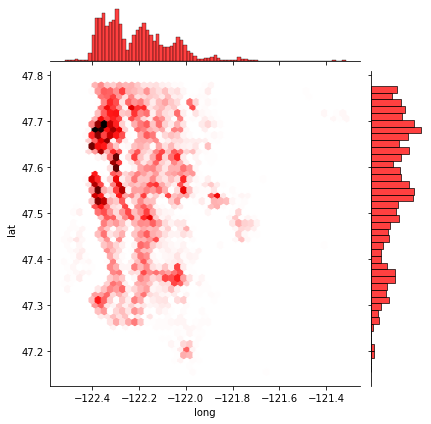

In [13]:
# visualization of ccordinates with a joint plot
sns.jointplot(x="long", y="lat", data=df, kind="hex", color = 'Red');

#### **Price Trend along Longitudes**

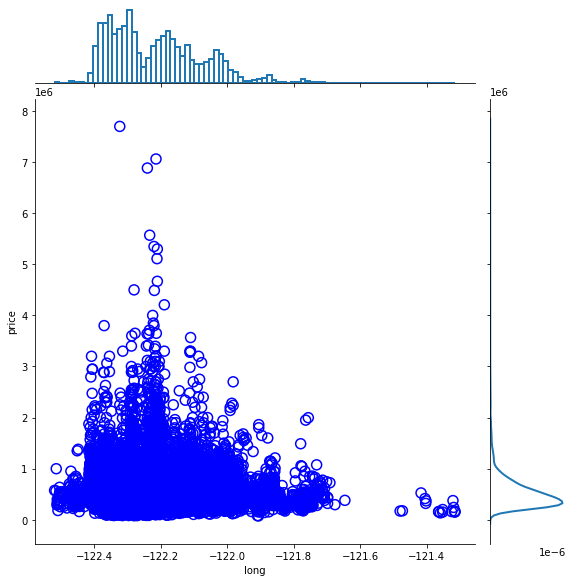

In [14]:
g = sns.JointGrid(height = 8)
x, y = df["long"], df["price"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y);

#### **Price Trend along Latitudes**

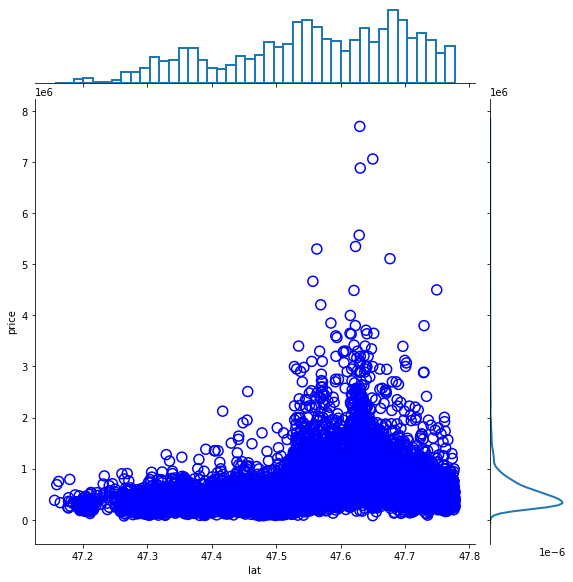

In [15]:
g = sns.JointGrid(height = 8)
x, y = df["lat"], df["price"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y);

**Interpretation:** House sale price shows a trend in increase moving up north along the longitude. However no change in trend across the longitude.  House sales recorded were more from the North Western regions of the City. 

To plot the scatter plot on top of a map, a shapefile can be downloaded, read, and transformed into useful maps utilizing geopandas. The shape file is obtained from [Seattle government open data website. ](https://data.seattle.gov/dataset/King-County-Census-2020-blocks-with-PL-94-171-Redi/ef7h-fyva). Make sure all other associated file are in the same directory as of the .shp file. 

In [16]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uninstalled Shapely-1.8.0
Note: you may need to restart the kernel to use updated packages.


In [18]:
import geopandas as gpd
KC = gpd.read_file('../input/kc-block-shape-file/kc_block_10.shp')
type(KC)

geopandas.geodataframe.GeoDataFrame

In [19]:
print(KC)
KC.head()

       OBJECTID STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE10          GEOID10  \
0             1        53        033    006700      1001  530330067001001   
1             2        53        033    006900      1009  530330069001009   
2             3        53        033    011600      3013  530330116003013   
3             4        53        033    011600      5021  530330116005021   
4             5        53        033    011600      5023  530330116005023   
...         ...       ...        ...       ...       ...              ...   
35833     35834        53        033    032316      1000  530330323161000   
35834     35835        53        033    021802      2054  530330218022054   
35835     35836        53        033    021802      2053  530330218022053   
35836     35837        53        033    032309      3038  530330323093038   
35837     35838        53        033    023000      2003  530330230002003   

           NAME10 MTFCC10  UR10 UACE10 FUNCSTAT10   ALAND10  AWATER10  \
0 

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TRACT_10,Shape_Leng,Shape_Area,TRBL,geometry
0,1,53,033,006700,1001,530330067001001,Block 1001,G5040,None,None,S,121128.0,0.0,+47.6319178,-122.3399002,6700,0.027448,1.449595e-05,6700.1001,"POLYGON ((-122.34063 47.63249, -122.34034 47.6..."
1,2,53,033,006900,1009,530330069001009,Block 1009,G5040,None,None,S,20412.0,0.0,+47.6368455,-122.3629779,6900,0.006327,2.443019e-06,6900.1009,"POLYGON ((-122.36232 47.63593, -122.36366 47.6..."
2,3,53,033,011600,3013,530330116003013,Block 3013,G5040,None,None,S,23687.0,0.0,+47.5235687,-122.3857630,11600,0.008314,2.828987e-06,11600.3013,"POLYGON ((-122.38455 47.52419, -122.38456 47.5..."
3,4,53,033,011600,5021,530330116005021,Block 5021,G5040,None,None,S,16082.0,0.0,+47.5204486,-122.3920438,11600,0.005893,1.920568e-06,11600.5021,"POLYGON ((-122.39178 47.51974, -122.39256 47.5..."
4,5,53,033,011600,5023,530330116005023,Block 5023,G5040,None,None,S,2697.0,0.0,+47.5205365,-122.3899013,11600,0.003135,3.220622e-07,11600.5023,"POLYGON ((-122.39022 47.52080, -122.38939 47.5..."


In [20]:
KC.columns

Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10',
       'GEOID10', 'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'TRACT_10',
       'Shape_Leng', 'Shape_Area', 'TRBL', 'geometry'],
      dtype='object')

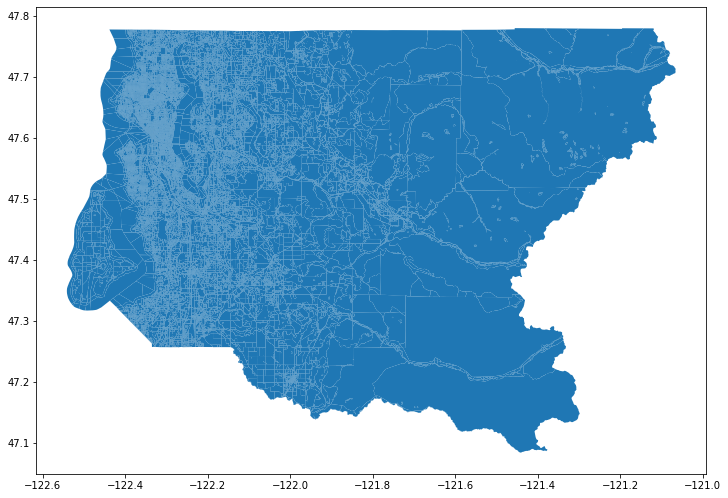

In [21]:
KC.plot(figsize=(12, 12));

**Understanding Coordinate Reference systems (CRS)**

In [22]:
KC.crs

<Geographic 2D CRS: GEOGCS["GCS_North_American_1983",DATUM["D_North_Am ...>
Name: NAD83
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

CRS: EPSG:2926 is used in the KC shape file dataset. The KC county house dataset contains latitude and longitude information in WGS84 lat/long CRS projection. So convert shapefile crs to df crs so that both are matched together. 

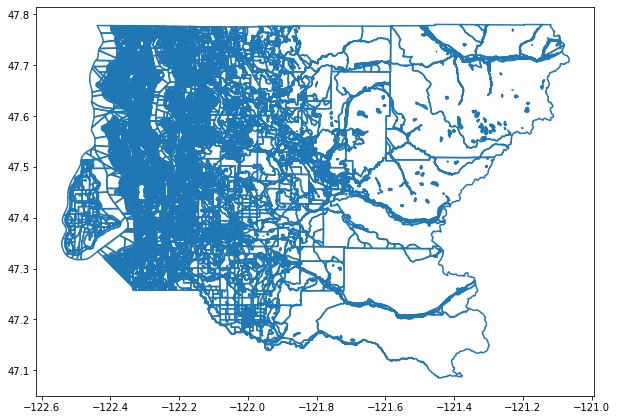

In [23]:
KC.to_crs(epsg=4326).boundary.plot(figsize = (10,10));

Plot the location of the houses on top of the shapefile map, utilizing Matplotlib’s subplots, to see where the properties are located on the map.

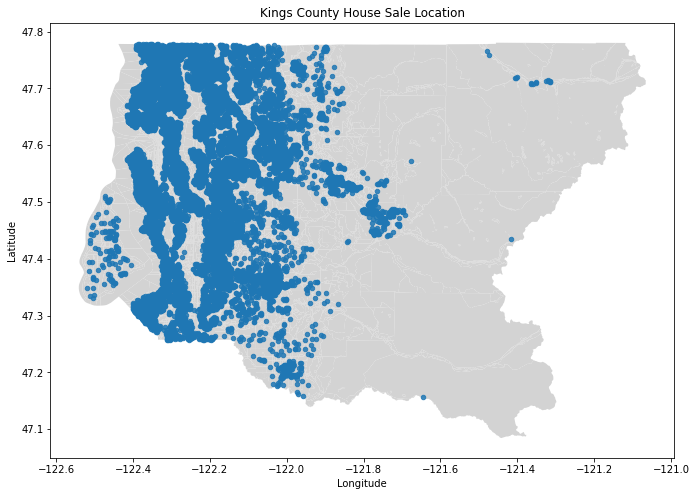

In [24]:
fig, ax = plt.subplots(figsize = (10,10))
KC.to_crs(epsg=4326).plot(ax=ax, color='lightgrey');
df.plot(kind = 'scatter', x= 'long', y='lat',alpha=.85,  
        cmap = 'rainbow', figsize=(15, 8), colorbar=False, legend = True, ax=ax)
ax.set_title('Kings County House Sale Location')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude");

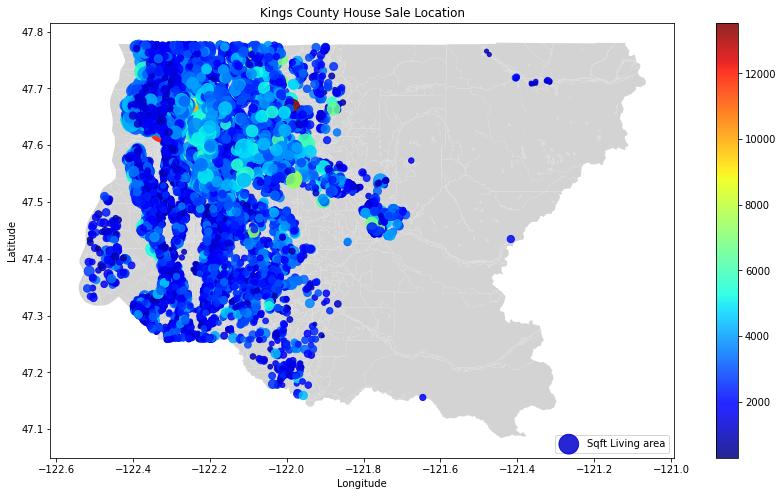

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
KC.to_crs(epsg=4326).plot(ax=ax, color='lightgrey');
df.plot(kind = 'scatter', x= 'long', y='lat',alpha=.85,s=df.price/10000, c =df.sqft_living,   
        label = 'Sqft Living area', cmap = 'jet', figsize=(15, 8), colorbar=True, legend = True, ax=ax)
ax.set_title('Kings County House Sale Location')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc = 'lower right');

It can be seen that majority of the houses are located more on the Northwestern part of the county than on the south as the points are a lot more dense to the North compared to the South.

Now that the shapefile is mapped to KC House data coordinates, it is possible to reformat the original KC data into a ‘GeoPandas Dataframe to see where the houses in the df are located without using a scatter plot. Specify the same CRS to match the shapefile. Latitudes and Longitude points are transformed into geometric points by utilizing shapely. Finally passing the original dataframe df with the ‘crs’ and ‘geometry’ variables into the GeoDataFrame function will create a new ‘geo_df’ that is a copy of the df but with the newly created ‘geometry’ column.

In [26]:
from shapely.geometry import Point, Polygon
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

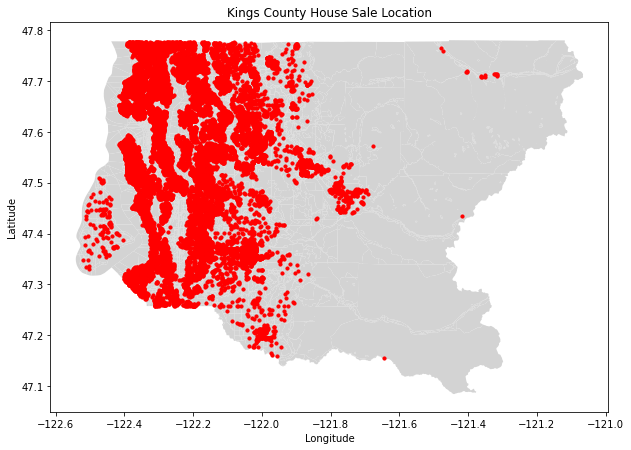

In [27]:
fig, ax = plt.subplots(figsize = (10,10))
KC.to_crs(epsg=4326).plot(ax=ax, color='lightgrey');
geo_df.plot(ax=ax, color = 'red', markersize = 10)
ax.set_title('Kings County House Sale Location')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude");

Now, the price column in the dataframe can be specified to create a heatmap of prices. To make highly skewed distributions less skewed log transformation can be used. Log transform the price data to reduce the effect of outliers. 

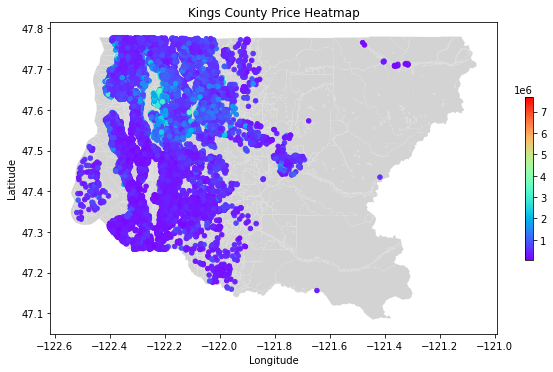

In [28]:
#Without log transformation
fig, ax = plt.subplots(figsize = (10,10))
KC.to_crs(epsg=4326).plot(ax=ax, color='lightgrey');
geo_df.plot(column = 'price', ax=ax, cmap = 'rainbow',legend = True, 
            legend_kwds={'shrink': 0.3}, markersize = 20)
ax.set_title('Kings County Price Heatmap')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude");

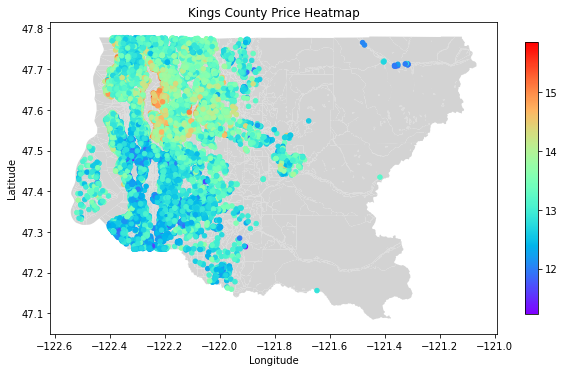

In [29]:
#With log transformation on 'price' column
geo_df['price_log'] = np.log(geo_df['price'])
fig, ax = plt.subplots(figsize = (10,10))
KC.to_crs(epsg=4326).plot(ax=ax, color='lightgrey');
geo_df.plot(column = 'price_log', ax=ax, cmap = 'rainbow',legend = True, 
            legend_kwds={'shrink': 0.5}, markersize = 20)
ax.set_title('Kings County Price Heatmap')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude");

It is now possible to see where the higher priced homes are located in Kings County. 

To see this same plot but for square feet of the houses sold, log transform 'sqft_living' column.

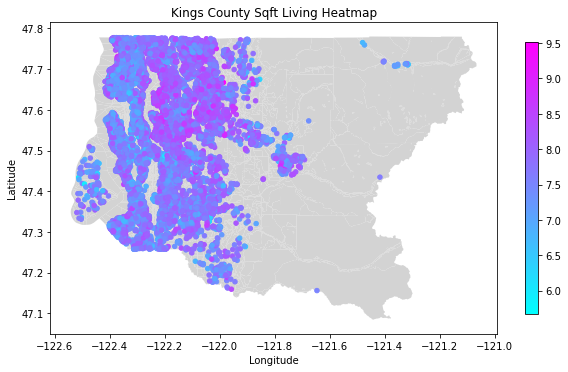

In [30]:
#With log transformation on 'price' column
geo_df['sqft_living_log'] = np.log(geo_df['sqft_living'])
fig, ax = plt.subplots(figsize = (10,10))
KC.to_crs(epsg=4326).plot(ax=ax, color='lightgrey');
geo_df.plot(column = 'sqft_living_log', ax=ax, cmap = 'cool',legend = True, 
            legend_kwds={'shrink': 0.5}, markersize = 20)
ax.set_title('Kings County Sqft Living Heatmap')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude");

East central parts tend to have more square feet living area compared to other parts of the County.  

### **Histogram of Weekly Sales**

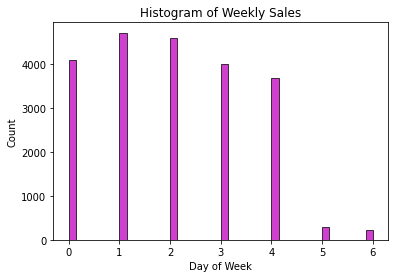

In [31]:
sns.histplot(x='Day of Week', data=df, color='m')
plt.title('Histogram of Weekly Sales');

In [32]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#Use the .map() with this dictionary to map the actual string names to the day of the week:
day_of_week = df['Day of Week'].map(dmap)
day_of_week.head()

0    Mon
1    Tue
2    Wed
3    Tue
4    Wed
Name: Day of Week, dtype: object

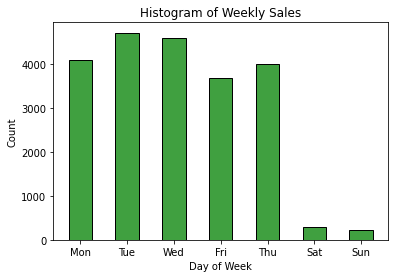

In [33]:
sns.histplot(day_of_week, color='green', shrink=0.5)
plt.title('Histogram of Weekly Sales');

### **Histogram of Monthly Sales**

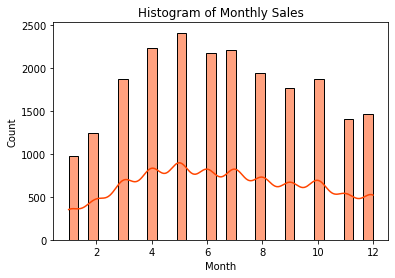

In [34]:
sns.histplot(x='Month', data=df, color='orangered', kde = True)
plt.title('Histogram of Monthly Sales');

### **Regression Plots**

#### **House sale price vs sqft_living**

Plot a simple linear relationship between two variables

In [35]:
x = df['sqft_living']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([   280.62934447, -43603.35252131])

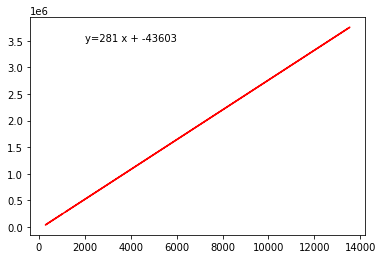

In [36]:
# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 3500000)); #xy is the point (x, y) to annotate. 

In [37]:
df['waterfront'].value_counts()

0    21449
1      163
Name: waterfront, dtype: int64

Condition on a third variable,'waterfront' and plot the points in different colors on a scatterplot.

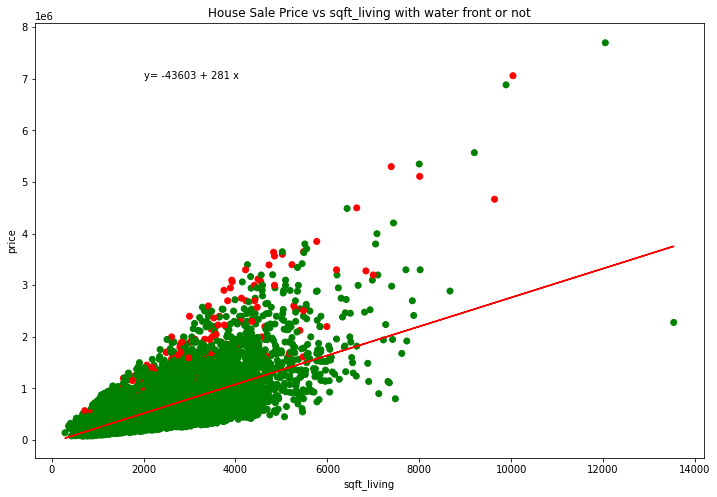

In [38]:
# plot line of best fit
plt.figure(figsize = (12,8))
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
colors = {0:'green', 1:'red'}
plt.scatter(x, y,  c= df['waterfront'].map(colors))
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.annotate('y= {1:.0f} + {0:.0f} x'.format(fit[0], fit[1]), xy=(2000, 7000000)) #xy is the point (x, y) to annotate. The coordinate system is determined by xycoords.
plt.title("House Sale Price vs sqft_living with water front or not");

#### **Number of bedrooms vs number of bathrooms with hue = 'condition'**

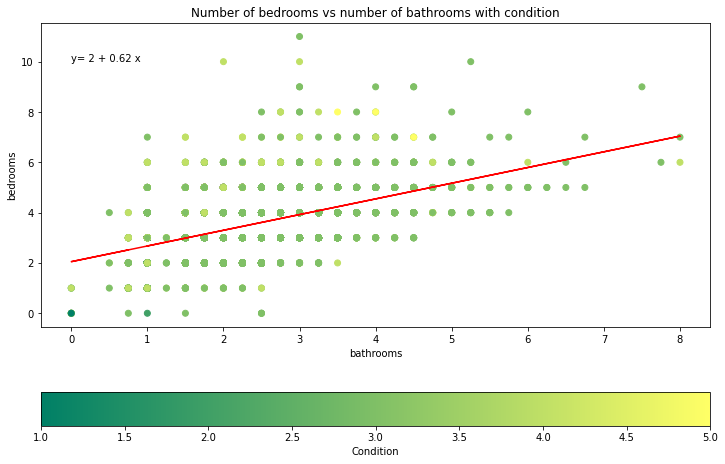

In [39]:
x = df['bathrooms']      # year on x-axis
y = df['bedrooms']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

# plot line of best fit
plt.figure(figsize = (12,8))
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
#colors = {1:'green', 2:'red', 3:'blue', 4:'yellow',5: 'orange' }
#plt.scatter(x, y,  c= df['condition'].map(colors))
plt.scatter(x, y,  c= df['condition'], cmap="summer")
plt.annotate('y= {1:.0f} + {0:.2f} x'.format(fit[0], fit[1]), xy=(0, 10)) #xy is the point (x, y) to annotate. The coordinate system is determined by xycoords.
plt.title("Number of bedrooms vs number of bathrooms with condition")
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')
plt.colorbar(label="Condition", orientation="horizontal")
plt.show()

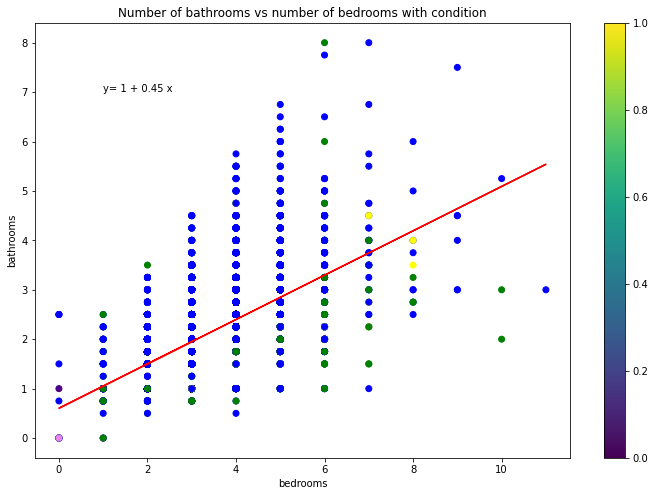

In [40]:
x = df['bedrooms']      # year on x-axis
y = df['bathrooms']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

# plot line of best fit
plt.figure(figsize = (12,8))
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
colors = {1:'violet', 2:'Indigo', 3:'blue', 4:'green',5: 'yellow' }
plt.scatter(x, y,  c= df['condition'].map(colors))
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.annotate('y= {1:.0f} + {0:.2f} x'.format(fit[0], fit[1]), xy=(1, 7)) #xy is the point (x, y) to annotate. The coordinate system is determined by xycoords.
plt.title("Number of bathrooms vs number of bedrooms with condition")
plt.colorbar();

#### **Seaborn regplot**
Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
With seaborn, generating a regression plot is as simple as calling the regplot function.

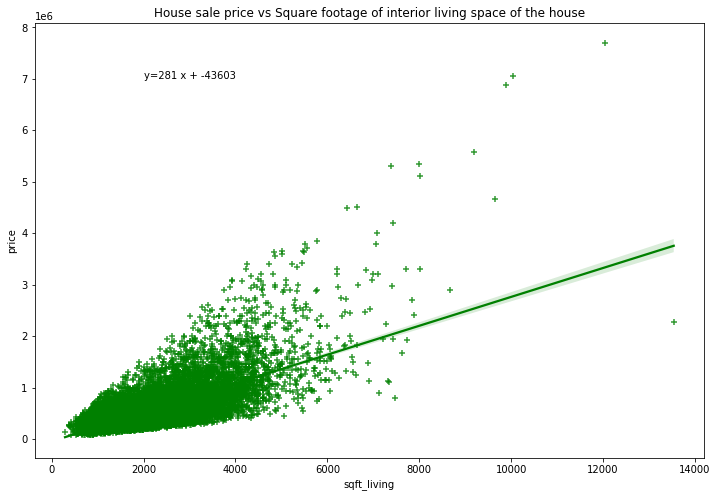

In [41]:
x = df['sqft_living']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

plt.figure(figsize = (12,8))
sns.regplot(x='sqft_living', y='price', data=df, color='green', marker='+')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 7000000)) 
plt.title("House sale price vs Square footage of interior living space of the house");

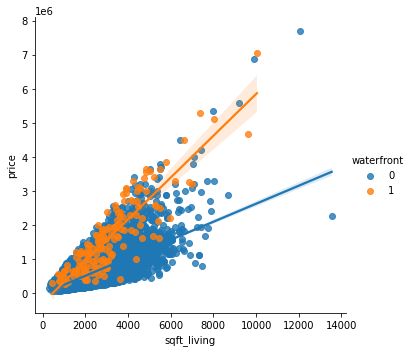

In [42]:
sns.lmplot(x="sqft_living", y="price", hue="waterfront", data=df);

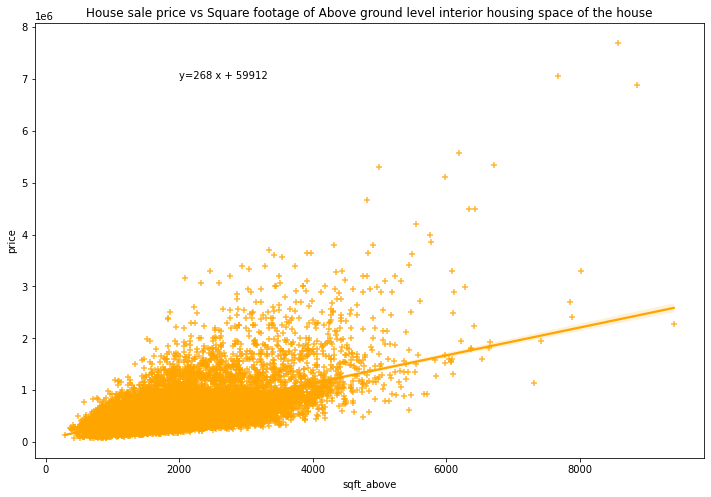

In [43]:
x = df['sqft_above']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

plt.figure(figsize = (12,8))
sns.regplot(x='sqft_above', y='price', data=df, color='orange', marker='+')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 7000000))
plt.title("House sale price vs Square footage of Above ground level interior housing space of the house");

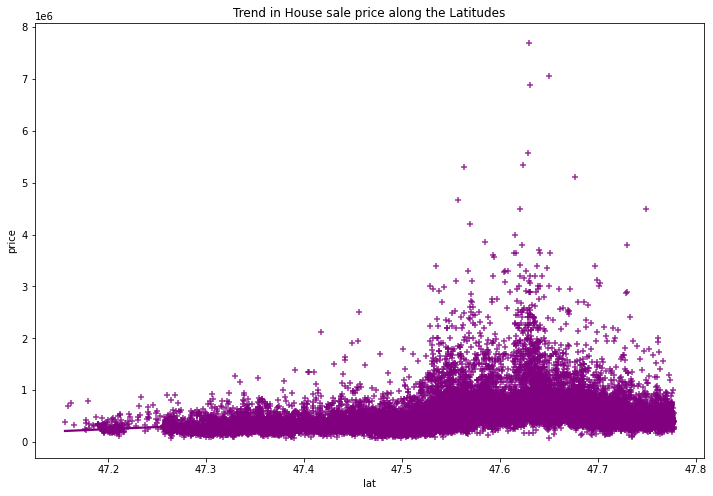

In [44]:
x = df['lat']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

plt.figure(figsize = (12,8))
sns.regplot(x='lat', y='price', data=df, color='purple', marker='+')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 7000000))
plt.title("Trend in House sale price along the Latitudes");

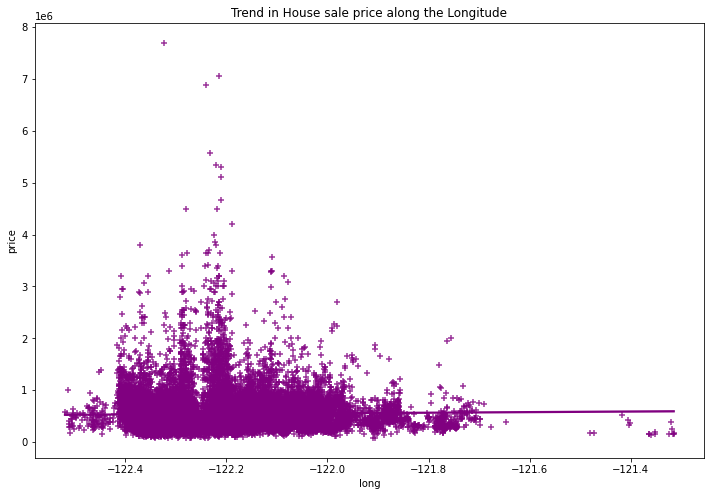

In [45]:
x = df['long']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

plt.figure(figsize = (12,8))
sns.regplot(x='long', y='price', data=df, color='purple', marker='+')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 7000000))
plt.title("Trend in House sale price along the Longitude");

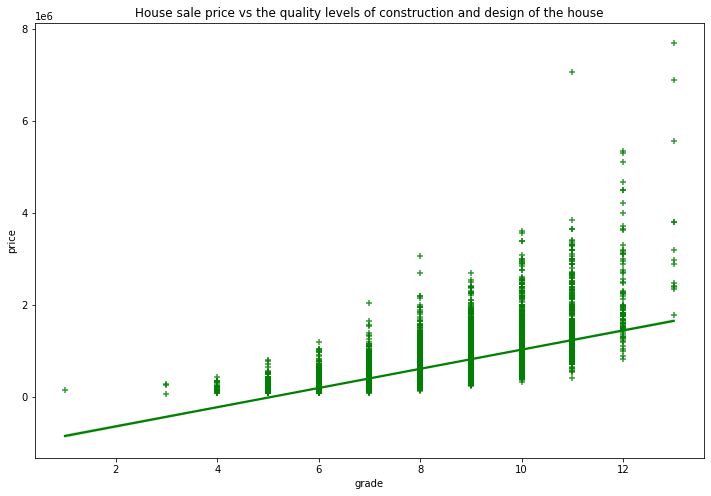

In [46]:
x = df['grade']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

plt.figure(figsize = (12,8))
sns.regplot(x='grade', y='price', data=df, color='green', marker='+')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 7000000))
plt.title("House sale price vs the quality levels of construction and design of the house");

#### **Year built vs Maximum sale price per year**

In [47]:
df_yr = df.groupby('yr_built').max()
df_yr.reset_index(inplace = True)
df_yr.head()

,yr_built,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning,price_log,sqft_living_log
0,1900,1695000.0,6,4.0,4380,262231,2.5,0,3,5,...,2980,84070,30,12,2015,6,1,1,14.343193,8.384804
1,1901,1225000.0,8,3.0,3440,7200,2.5,0,2,5,...,2822,7200,30,12,2015,5,1,1,14.018451,8.143227
2,1902,1990000.0,6,3.0,4480,15438,2.5,0,2,5,...,4480,14406,28,11,2015,6,1,1,14.503645,8.407378
3,1903,1020000.0,6,3.5,2800,46173,2.5,1,4,5,...,3150,21780,27,12,2015,4,1,1,13.835313,7.937375
4,1904,3300000.0,8,4.0,7710,47044,3.5,0,2,5,...,4210,12541,30,12,2015,5,1,1,15.009433,8.950273


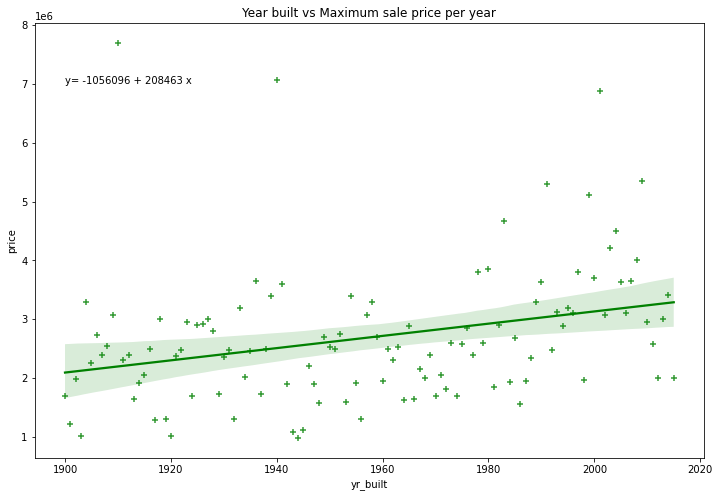

In [48]:
plt.figure(figsize = (12,8))
sns.regplot(x='yr_built', y='price', data=df_yr, color='green', marker='+')
plt.annotate('y= {1:.0f} + {0:.0f} x'.format(fit[0], fit[1]), xy=(1900,7000000))
plt.title("Year built vs Maximum sale price per year");

#### **Year built vs Total sale price per year**

In [49]:
df_yr = df.groupby('yr_built').sum()
df_yr.reset_index(inplace = True)
df_yr.head()

,yr_built,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning,price_log,sqft_living_log
0,1900,50580687.0,285,150.50,150685,945655,131.0,0,22,307,...,145039,628331,1386,579,175244,158,30,26,1143.808486,641.681600
1,1901,16151142.0,105,45.75,51145,120145,45.5,0,2,106,...,44398,114488,479,190,58414,50,12,10,382.150286,214.791881
2,1902,18171200.0,96,52.00,51830,128696,47.0,0,2,98,...,51670,123576,400,167,54385,55,10,10,359.324246,201.913605
3,1903,22124077.0,141,69.25,69356,292770,67.0,1,11,161,...,70730,243973,712,311,92657,109,15,14,597.478421,334.239080
4,1904,26269049.0,131,67.50,72143,243450,60.5,0,3,171,...,73360,207003,783,273,90647,89,18,6,590.788878,326.971176


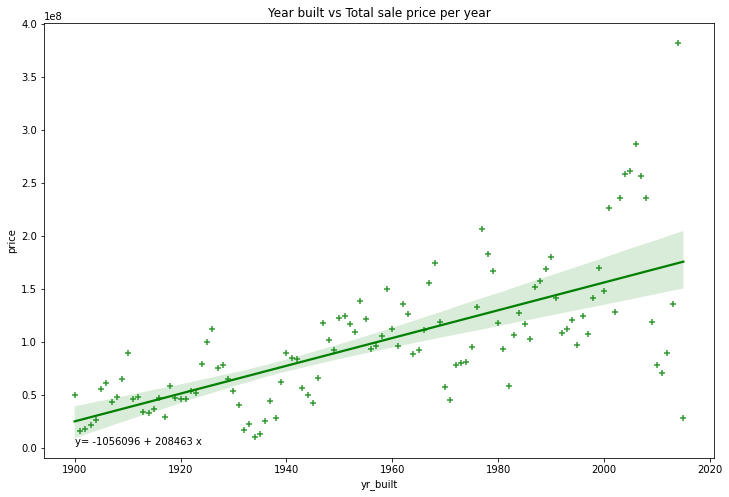

In [50]:
plt.figure(figsize = (12,8))
sns.regplot(x='yr_built', y='price', data=df_yr, color='green', marker='+')
plt.title("Year built vs Total sale price per year")
plt.annotate('y= {1:.0f} + {0:.0f} x'.format(fit[0], fit[1]), xy=(1900,3500000));

#### **Year built vs Average sale price per year**

In [51]:
df_yr = df.groupby('yr_built').mean()
df_yr.reset_index(inplace = True)
df_yr.head()

,yr_built,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning,price_log,sqft_living_log
0,1900,581387.206897,3.275862,1.729885,1732.011494,10869.597701,1.505747,0.000000,0.252874,3.528736,...,1667.114943,7222.195402,15.931034,6.655172,2014.298851,1.816092,0.344828,0.298851,13.147224,7.375651
1,1901,556935.931034,3.620690,1.577586,1763.620690,4142.931034,1.568966,0.000000,0.068966,3.655172,...,1530.965517,3947.862069,16.517241,6.551724,2014.275862,1.724138,0.413793,0.344828,13.177596,7.406617
2,1902,673007.407407,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,...,1913.703704,4576.888889,14.814815,6.185185,2014.259259,2.037037,0.370370,0.370370,13.308305,7.478282
3,1903,480958.195652,3.065217,1.505435,1507.739130,6364.565217,1.456522,0.021739,0.239130,3.500000,...,1537.608696,5303.760870,15.478261,6.760870,2014.282609,2.369565,0.326087,0.304348,12.988661,7.266067
4,1904,583756.644444,2.911111,1.500000,1603.177778,5410.000000,1.344444,0.000000,0.066667,3.800000,...,1630.222222,4600.066667,17.400000,6.066667,2014.377778,1.977778,0.400000,0.133333,13.128642,7.266026


Text(0.5, 1.0, 'Year built vs Average sale price per year')

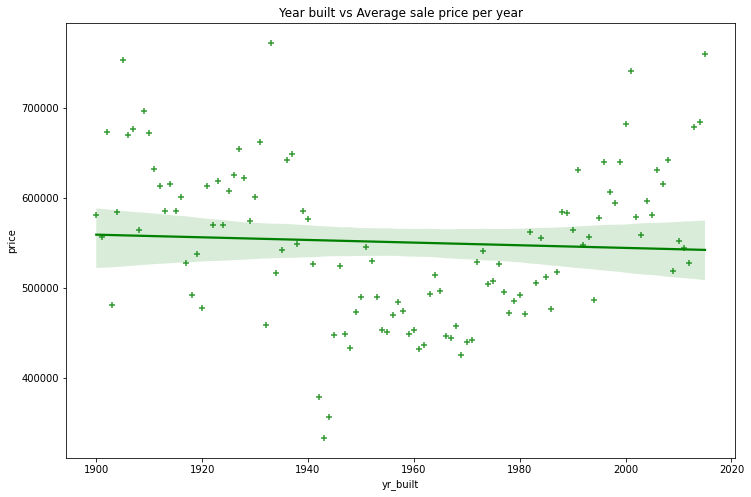

In [52]:
plt.figure(figsize = (12,8))
sns.regplot(x='yr_built', y='price', data=df_yr, color='green', marker='+')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(1900,700000000))
plt.title("Year built vs Average sale price per year")

#### **House sale price vs Decade in which the House was last renovated**

In [53]:
renovated = df.groupby('yr_renovated').mean()
renovated.reset_index(inplace = True)
renovated.head()

,yr_renovated,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning,price_log,sqft_living_log
0,0,530355.521065,3.365784,2.106641,2069.288772,15039.991835,1.493623,0.005846,0.217557,3.417577,...,1986.981061,12723.400473,15.673012,6.566045,2014.325297,2.010774,0.341337,0.295826,13.035170,7.545806
1,1934,459950.000000,3.000000,1.750000,1850.000000,6869.000000,1.000000,0.000000,2.000000,5.000000,...,1850.000000,10096.000000,13.000000,6.000000,2014.000000,4.000000,0.000000,0.000000,13.038873,7.522941
2,1940,378400.000000,2.000000,1.000000,1150.000000,4470.000000,1.000000,0.000000,0.000000,3.500000,...,1295.000000,5500.000000,11.000000,8.000000,2014.000000,0.000000,0.000000,0.500000,12.828685,7.035115
3,1944,521000.000000,3.000000,2.000000,1840.000000,6000.000000,1.000000,0.000000,0.000000,4.000000,...,2010.000000,6000.000000,23.000000,10.000000,2014.000000,3.000000,1.000000,0.000000,13.163505,7.517521
4,1945,398666.666667,2.666667,1.583333,1530.000000,5666.666667,1.333333,0.000000,0.000000,3.333333,...,1540.000000,6577.333333,13.666667,5.000000,2014.333333,2.333333,0.333333,0.333333,12.844065,7.244364


In [54]:
# Average Price of non-renovated houses
print("Average Price of Non-renovated Houses:", renovated.iloc[0]['price'])

Average Price of Non-renovated Houses: 530355.5210648372


In [55]:
# Average Price of renovated houses
print("Average Price of Renovated Houses:", renovated.iloc[1:70].mean()['price'])

Average Price of Renovated Houses: 645816.5905966576


In [56]:
renovated['yr_renovated'].iloc[1:70] = renovated['yr_renovated'].iloc[1:70].astype('string').apply(lambda x: x[2:3]+'0')
renovated.head()

,yr_renovated,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning,price_log,sqft_living_log
0,0,530355.521065,3.365784,2.106641,2069.288772,15039.991835,1.493623,0.005846,0.217557,3.417577,...,1986.981061,12723.400473,15.673012,6.566045,2014.325297,2.010774,0.341337,0.295826,13.035170,7.545806
1,30,459950.000000,3.000000,1.750000,1850.000000,6869.000000,1.000000,0.000000,2.000000,5.000000,...,1850.000000,10096.000000,13.000000,6.000000,2014.000000,4.000000,0.000000,0.000000,13.038873,7.522941
2,40,378400.000000,2.000000,1.000000,1150.000000,4470.000000,1.000000,0.000000,0.000000,3.500000,...,1295.000000,5500.000000,11.000000,8.000000,2014.000000,0.000000,0.000000,0.500000,12.828685,7.035115
3,40,521000.000000,3.000000,2.000000,1840.000000,6000.000000,1.000000,0.000000,0.000000,4.000000,...,2010.000000,6000.000000,23.000000,10.000000,2014.000000,3.000000,1.000000,0.000000,13.163505,7.517521
4,40,398666.666667,2.666667,1.583333,1530.000000,5666.666667,1.333333,0.000000,0.000000,3.333333,...,1540.000000,6577.333333,13.666667,5.000000,2014.333333,2.333333,0.333333,0.333333,12.844065,7.244364


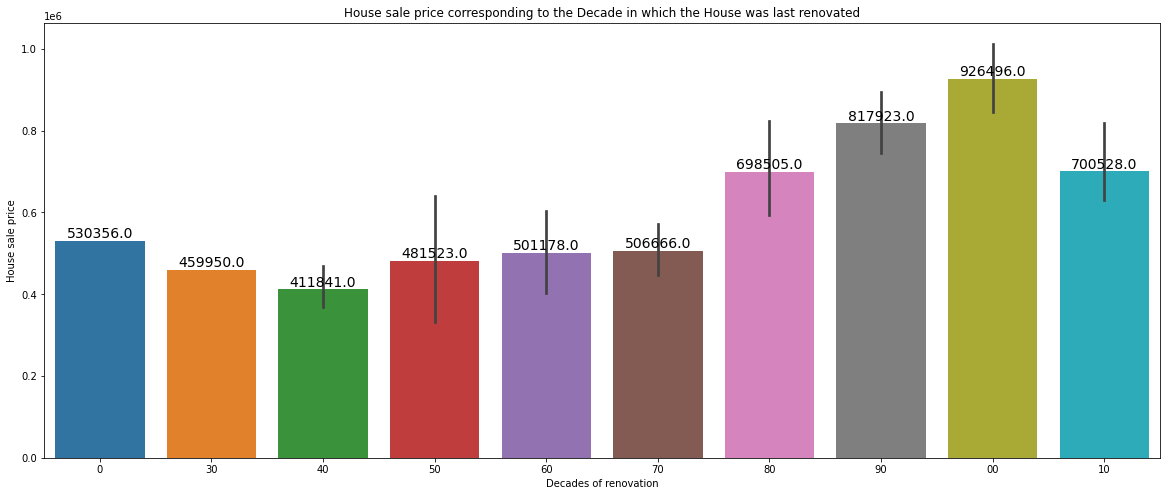

In [57]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x = 'yr_renovated', y = 'price', data = renovated)
ax.set_xlabel('Decades of renovation')
ax.set_ylabel('House sale price')
plt.title('House sale price corresponding to the Decade in which the House was last renovated')
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, 
                str(height.round(0)), ha='center', va='bottom', fontsize = 14);

Recently renovated houses have higher prices compared to non renovated houses & those renovated decades back 

#### **House Sale Price Trend with the Decade in which the house was initially built**

In [58]:
decade_built = df.groupby('yr_built').mean()
decade_built.reset_index(inplace = True)
decade_built['yr_built']= decade_built['yr_built'].astype('string').apply(lambda x: x[0:3]+'0')
decade_built.head()

,yr_built,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning,price_log,sqft_living_log
0,1900,581387.206897,3.275862,1.729885,1732.011494,10869.597701,1.505747,0.000000,0.252874,3.528736,...,1667.114943,7222.195402,15.931034,6.655172,2014.298851,1.816092,0.344828,0.298851,13.147224,7.375651
1,1900,556935.931034,3.620690,1.577586,1763.620690,4142.931034,1.568966,0.000000,0.068966,3.655172,...,1530.965517,3947.862069,16.517241,6.551724,2014.275862,1.724138,0.413793,0.344828,13.177596,7.406617
2,1900,673007.407407,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,...,1913.703704,4576.888889,14.814815,6.185185,2014.259259,2.037037,0.370370,0.370370,13.308305,7.478282
3,1900,480958.195652,3.065217,1.505435,1507.739130,6364.565217,1.456522,0.021739,0.239130,3.500000,...,1537.608696,5303.760870,15.478261,6.760870,2014.282609,2.369565,0.326087,0.304348,12.988661,7.266067
4,1900,583756.644444,2.911111,1.500000,1603.177778,5410.000000,1.344444,0.000000,0.066667,3.800000,...,1630.222222,4600.066667,17.400000,6.066667,2014.377778,1.977778,0.400000,0.133333,13.128642,7.266026


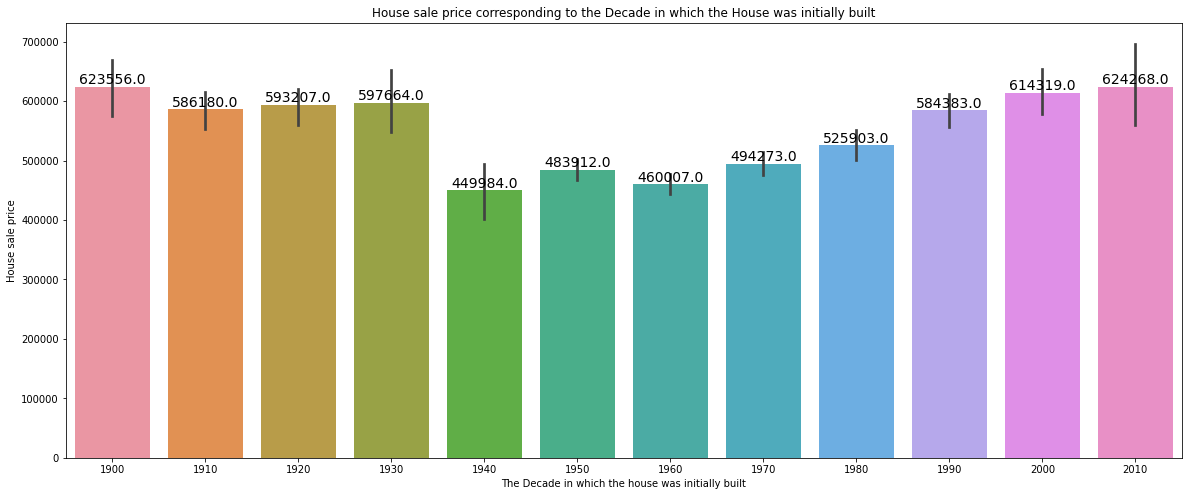

In [59]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x = 'yr_built', y = 'price', data = decade_built)
ax.set_xlabel('The Decade in which the house was initially built')
ax.set_ylabel('House sale price')
plt.title('House sale price corresponding to the Decade in which the House was initially built')
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, 
                str(height.round(0)), ha='center', va='bottom', fontsize = 14);

Century old houses were priced in the similar price range of recently built houses in 2000-2015. 1940 houses registered the lowest prices, after which prices increase consistently with each decade. 